In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

In [3]:
def computeBlackScholesCallPrice(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma* np.sqrt(T-t)
    return S*stat.norm.cdf(d1) - K*np.exp(-r*(T-t))*stat.norm.cdf(d2)

def computeBlackScholesPutPrice(t,T,S,r,sigma,K):
    return computeBlackScholesCallPrice(t,T,S,r,sigma,K) - (S - K*np.exp(-r*(T-t)))

In [4]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

def put_option_payoff(K, S):
    return np.maximum(K-S,0)

In [5]:
default_params = {
'K' : 100,
't' : 0,
'T' : 1,
'r' : 0.03,
'S' : 100,
'sigma' : 0.1
}

K = default_params['K']
S = np.linspace(start = 50,stop = 150, num = 1000)
t = default_params['t']
T = default_params['T']
r = default_params['r']
sigma = default_params['sigma']

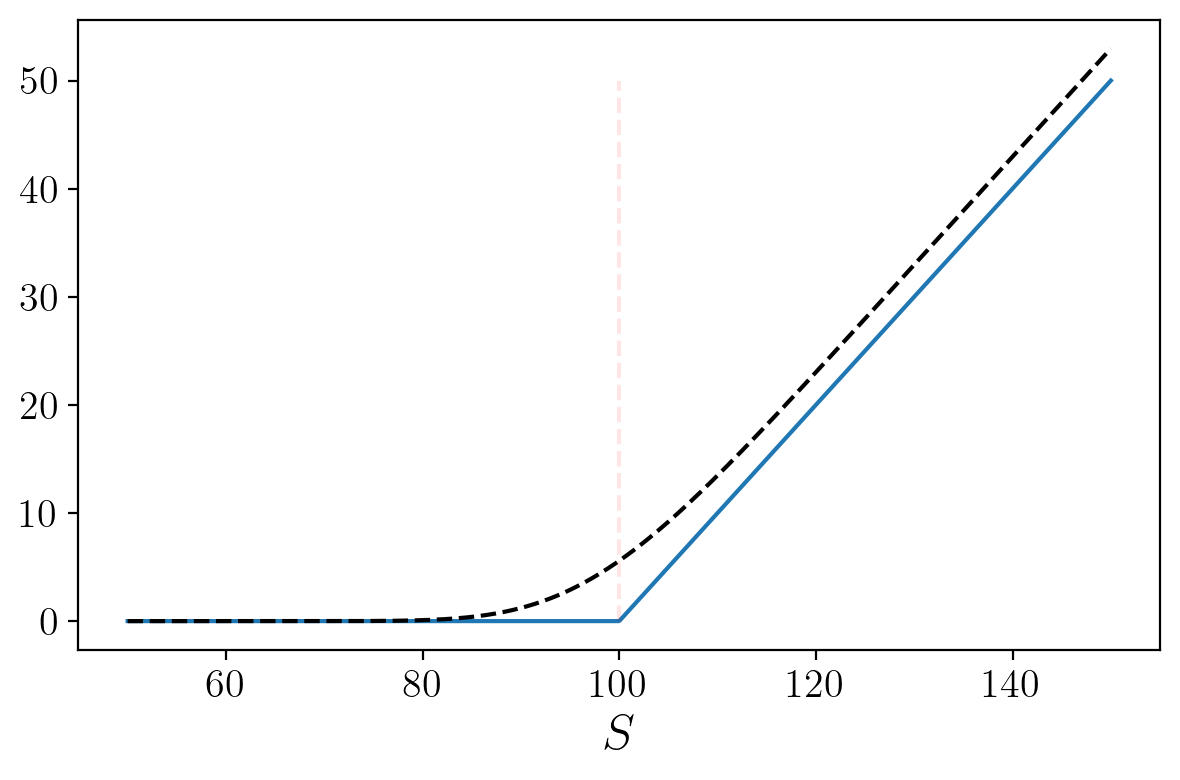

In [6]:
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
payoff = call_option_payoff(K = K, S = S)

plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.plot(S, prices, linestyle = '--', color='black')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-price-vs-payoff.pdf', format="pdf", dpi=resolution_value)
plt.show()

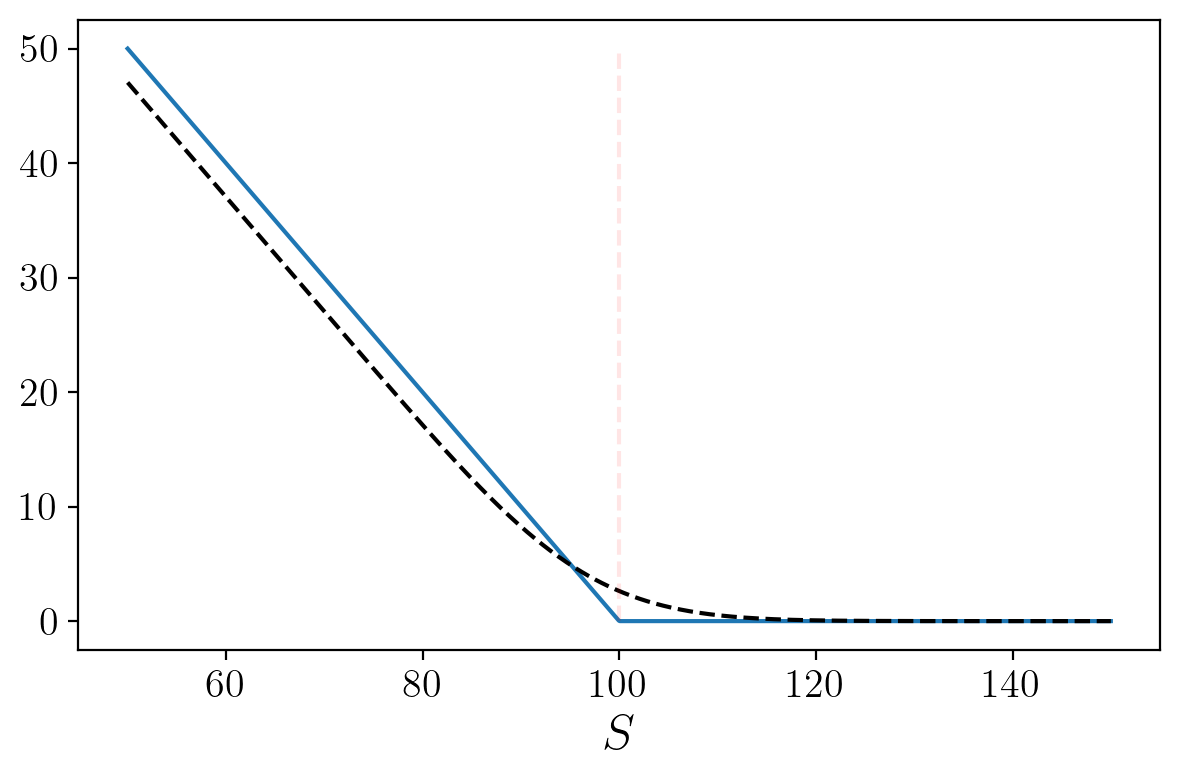

In [7]:
prices = computeBlackScholesPutPrice(t,T,S,r,sigma,K)
payoff = put_option_payoff(K = K, S = S)

plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.plot(S, prices, linestyle = '--', color='black')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/put-price-vs-payoff.pdf', format="pdf", dpi=resolution_value)
plt.show()

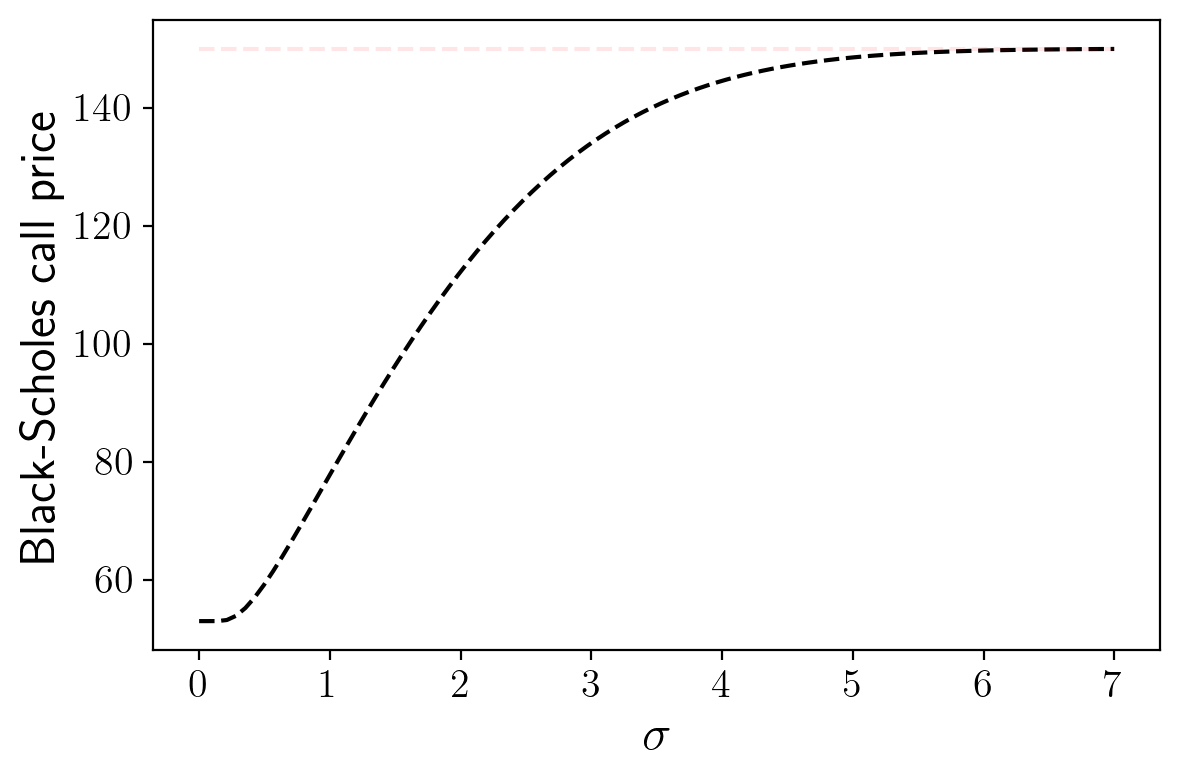

In [8]:
S = 150
sigma = np.linspace(start = 0,stop = 7, num = 100)
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)

plt.figure()
plt.plot(sigma, prices, linestyle = '--', color='black')
plt.hlines(y = S, xmin = 0, xmax = np.max(sigma), color = 'r', linestyles='--', alpha = 0.1)
#plt.hlines(y = S-K, xmin = 0, xmax = np.max(sigma), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$\sigma$',  fontsize=18)
plt.ylabel('Black-Scholes call price',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-price-as-a-fct-of-vol.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Plot tangent

In [9]:
S = np.linspace(start = 80,stop = 120, num = 100)
sigma = default_params['sigma']

In [10]:
def computeDeltaCall(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    return stat.norm.cdf(d1)

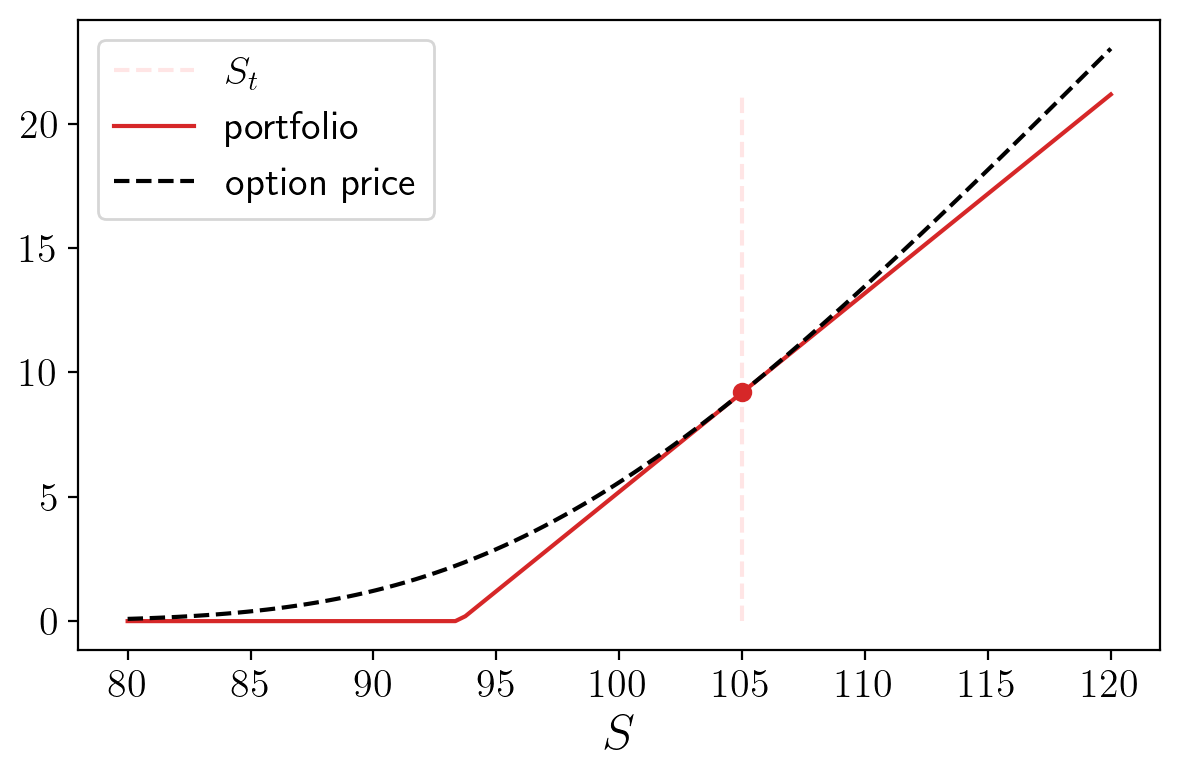

In [11]:
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)

S_now = 105
p_now = computeBlackScholesCallPrice(t,T,S_now,r,sigma,K)
D_now = computeDeltaCall(t,T,S_now,r,sigma,K)
zero_S = S_now -  p_now/D_now
zero_S

def portfolio_now(Z, D, S):
    return np.maximum(D*(S-Z),0)
payoff = portfolio_now(zero_S, D_now, S)

plt.figure()
plt.vlines(x = S_now, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1, label = r'$S_{t}$')
plt.plot(S, payoff, linestyle = '-', color = 'tab:red', label = r'portfolio')
plt.plot(S, prices, linestyle = '--', color='black', label = 'option price')
plt.plot(S_now, p_now, 'o', color='tab:red')
resolution_value = 50
plt.tight_layout()
plt.legend()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-price-vs-fixed-portfolio.pdf', format="pdf", dpi=resolution_value)
plt.show()

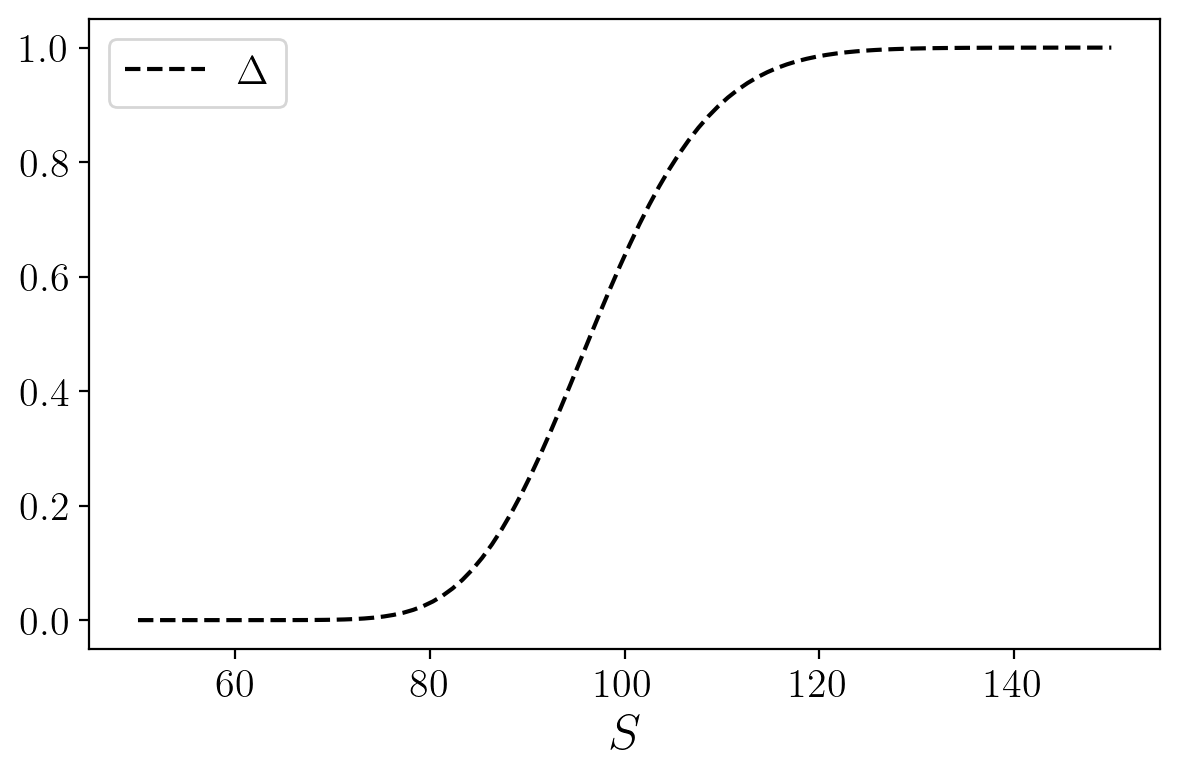

In [12]:
S = np.linspace(start = 50,stop = 150, num = 100)
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
Delta = computeDeltaCall(t,T,S,r,sigma,K)

plt.figure()
plt.plot(S, Delta, linestyle = '--', color='black', label = r'$\Delta$')
resolution_value = 50
plt.tight_layout()
plt.legend()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-option-Delta.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Discretisation error plot

In [13]:
GBM = utils.GeometricBrownianMotion(x0=default_params['S'], mu=default_params['r'], 
                                    sigma=default_params['sigma'], T=default_params['T'], Nt=1000)

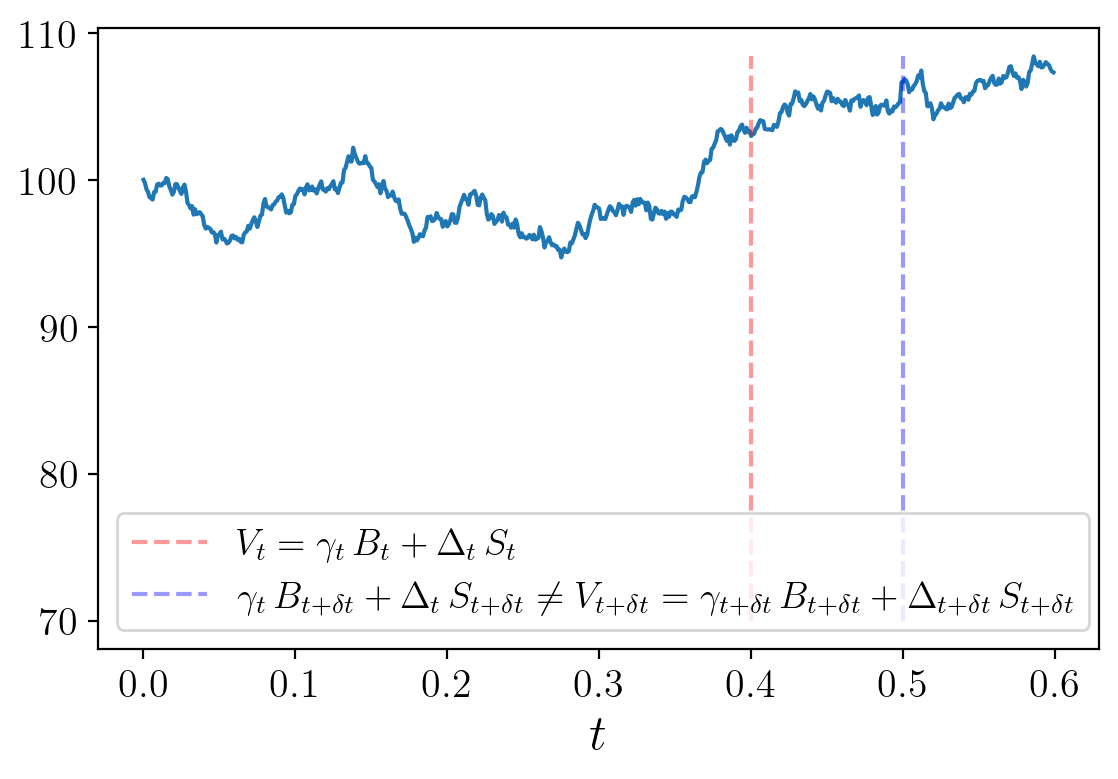

In [14]:
idx = np.argwhere(GBM.timesteps<0.6)

x = GBM.timesteps[idx]
y = GBM.simulate(nsims = 1)[idx].reshape(-1,1)

plt.figure()
plt.plot(x, y, linestyle = '-')
plt.vlines(x = 0.4, ymin = 70, ymax = np.max(y), color = 'r', linestyles='--', alpha = 0.4, label= r'$V_t = \gamma_t\,B_t + \Delta_t\,S_t$')
plt.vlines(x = 0.5, ymin = 70, ymax = np.max(y), color = 'b', linestyles='--', alpha = 0.4, label= r'$\gamma_{t}\,B_{t+\delta t} + \Delta_{t}\,S_{t+\delta t}\neq V_{t+\delta t}=\gamma_{t+\delta t}\,B_{t+\delta t} + \Delta_{t+\delta t}\,S_{t+\delta t}$')
resolution_value = 50
plt.xlabel(r'$t$',  fontsize=18)
plt.legend(fontsize = 13.5)
plt.tight_layout()
plt.savefig('../figures/discretisation-error.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [17]:
def computeGammaCall(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    return np.exp(-0.5*d1**2) / (S* sigma*np.sqrt(2*3.14159*(T-t)))

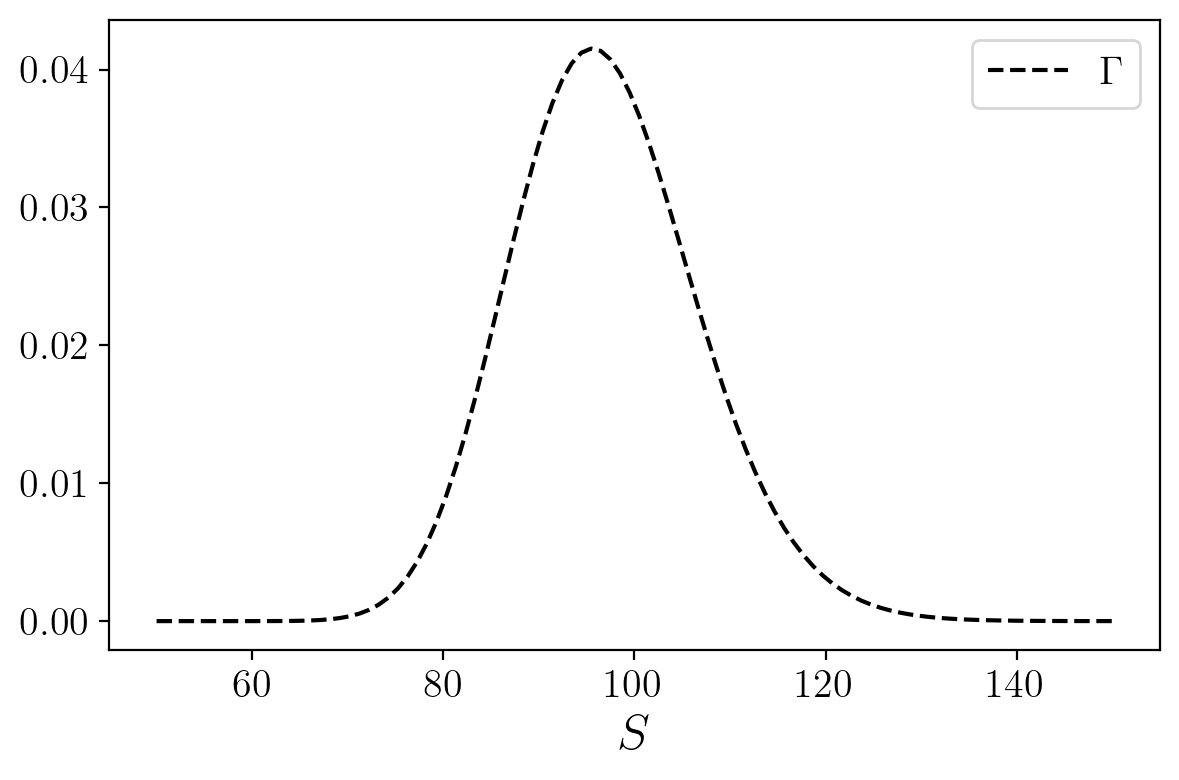

In [18]:
S = np.linspace(start = 50,stop = 150, num = 100)
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
Gamma = computeGammaCall(t,T,S,r,sigma,K)

plt.figure()
plt.plot(S, Gamma, linestyle = '--', color='black', label = r'$\Gamma$')
resolution_value = 50
plt.tight_layout()
plt.legend()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-option-Gamma.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [19]:
def computeVegaCall(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    return np.exp(-0.5*d1**2) * (S* np.sqrt((T-t)/(2*3.14159)))

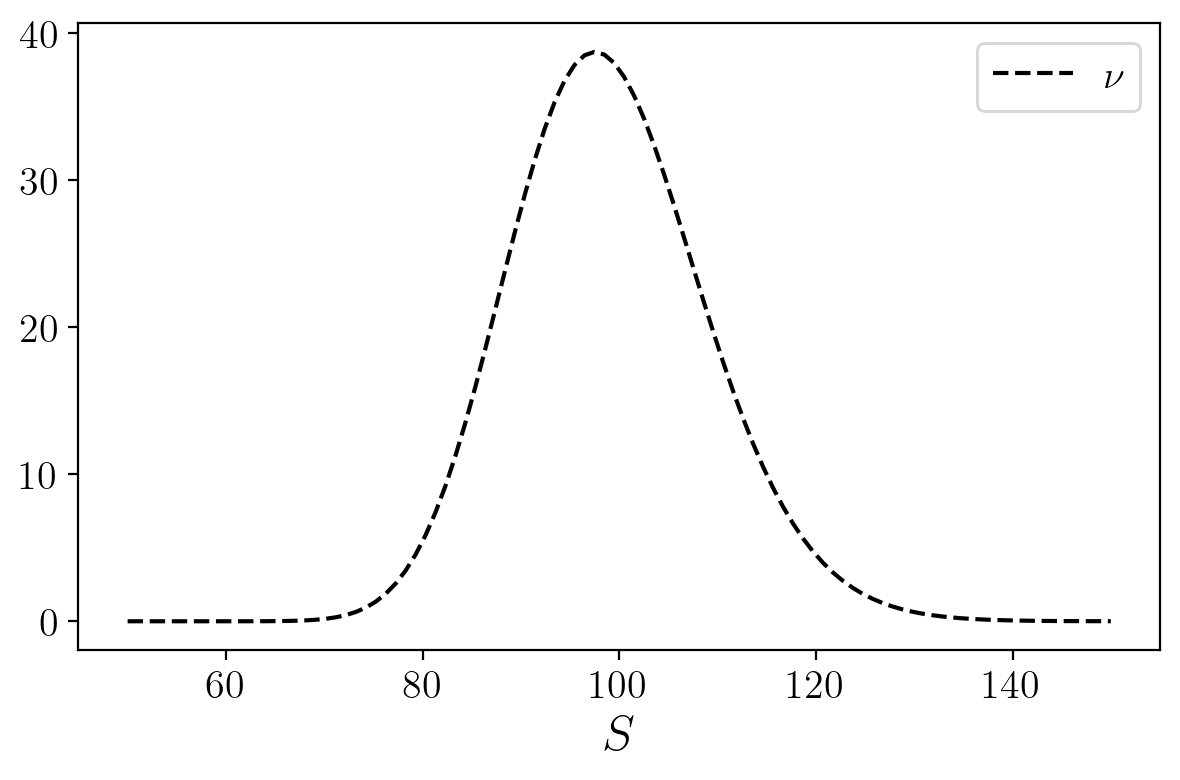

In [23]:
S = np.linspace(start = 50,stop = 150, num = 100)
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
Vega = computeVegaCall(t,T,S,r,sigma,K)

plt.figure()
plt.plot(S, Vega, linestyle = '--', color='black', label = r'$\nu$')
resolution_value = 50
plt.tight_layout()
plt.legend()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-option-Vega.pdf', format="pdf", dpi=resolution_value)
plt.show()